<a href="https://colab.research.google.com/github/marceloBilbyIA/projeto-plate/blob/main/Projeto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Instalação


In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!mkdir tessdata
!wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
!pip install selenium
!apt-get update
!apt instal chromium-chromedriver 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘tessdata’: File exists
--2022-08-12 04:34:20--  https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata [following]
--2022-08-12 04:34:20--  https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata
Reusing existing conne

In [ ]:
import pytesseract
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image, ImagePalette
import matplotlib.pyplot as plt
import numpy as np 
from selenium import webdriver
import time

In [ ]:
def mostrar(img):
   fig = plt.gcf()
   fig.set_size_inches(16, 8)
   plt.axis("off")
   plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
   plt.show()

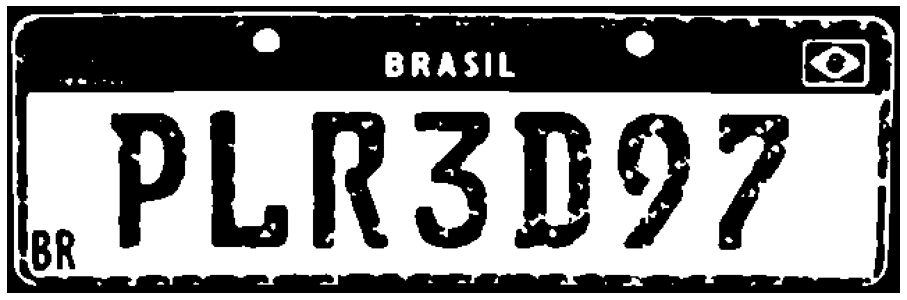

PLACA:  PLR3D97


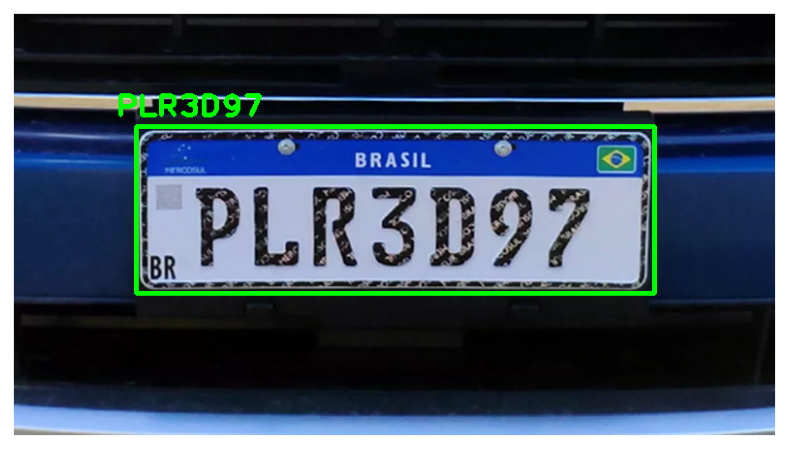

In [ ]:
placa = []
image = cv2.imread('/content/PLR3D97.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.blur(gray,(3,3))
canny = cv2.Canny(gray,150,200)
canny = cv2.dilate(canny,None,iterations=2)
cnts,_ = cv2.findContours(canny,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

for c in cnts:
  area = cv2.contourArea(c)
  x,y,w,h = cv2.boundingRect(c)
  epsilon = 0.11*cv2.arcLength(c,True)
  approx = cv2.approxPolyDP(c,epsilon,True)
  
  if len(approx) > 3 or len(approx) < 6 and area>15000:
    aspect_ratio = float(w)/h
    if aspect_ratio > 3.08 and aspect_ratio < 4.48:
      placa = gray[y:y+h,x:x+w]   
      redimensiona = cv2.resize(placa, None, fx=1.2, fy=1.2, interpolation=cv2.INTER_CUBIC) 
      valor, otsu = cv2.threshold(redimensiona, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

      mostrar(otsu)
      tesseract_config = '--psm 6'
      text = pytesseract.image_to_string(otsu, config=tesseract_config)
      #text = pytesseract.image_to_string(cv2.imread(placa))
      text = "".join(caractere for caractere in text if caractere.isalnum())
      print('PLACA: ',text)
      cv2.rectangle(image, (x,y), (x+w, y+h), (0, 255, 0), 3)
      cv2.putText(image, text, (x-20, y-10), 1, 2.2, (0,255,0), 3)
      

      mostrar(image)
      

#Selenium

In [ ]:
chrome_options = webdriver.ChromeOptions()

In [ ]:
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

In [ ]:
wd_chrome = webdriver.Chrome(chrome_options=chrome_options)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: use options instead of chrome_options
  """Entry point for launching an IPython kernel.


In [ ]:
wd_chrome.get('https://portal.sesp.mt.gov.br/portaldaseguranca/pages/veiculo/consultaVeiculoRoubado.seam?cid=426993')

In [ ]:
time.sleep(10)
recaptcha = wd_chrome.find_element(By.cssSelector, ('.recaptcha-checkbox-border'))

AttributeError: ignored